# Tarea 1

En esta libreda de Jupyter se solucionan los problemas de la tarea 1.

Autor: <b>Nicolás Quijada</b>

---

## Ejercicio 1

Lectura de datos


---


## Ejercicio 2: Derivación e integración numérica

### Derivación numérica hasta cuarto orden

En este ejercicio programamos un algoritmo que nos de la derivada numérica de una función cuyo dominio esté espaciado uniformemente por una distancia $h$. La estrategia a seguir es la siguiente:

<ul>
    <li>Utilizar la deducción para la derivada en un punto $f_i$ en el interior de la malla.<\li>
    <li>Programar la derivada para los puntos en el conjunto ${x_2,\dots,x_{x-2}}$</li>
    <li>Programar la derivada para los puntos faltantes del dominio</li>


In [4]:
from pylab import *

In [5]:
def der_h4(x,f): #La función recibe una cantidad de puntos x y sus imágenes en f en forma de listas
    f_prima = zeros_like(f) #Creamos una lista con espacio para cada punto a derivar
    h = x[1] - x[0] #Definimos el espaciado uniforme de la malla x como. 
    for i in range(2,len(f)-2): #Calculamos la derivada para los puntos interiores y excluimos al segundo y penúltimo.
        f_prima[i] = (-f[i+2] + 8*f[i+1]-8*f[i-1] + f[i-2])/(12*h) #Fórmula calculada con Taylor
    
    #Ahora calculamos la derivada en los puntos faltantes con la dedución del sistema de ecuaciones
    f_prima[0] = (-25/12*f[0] + 4*f[1] - 3*f[2] +4/3*f[3] - 1/4*f[4])/h
    f_prima[1] = (-25/12*f[1] + 4*f[2] - 3*f[3] +4/3*f[4] - 1/4*f[5])/h
    f_prima[-1] = (-25/12*f[-1] + 4*f[-2] - 3*f[-3] +4/3*f[-4] - 1/4*f[-5])/(-h)
    f_prima[-2] = (-25/12*f[-2] + 4*f[-3] - 3*f[-4] +4/3*f[-5] - 1/4*f[-6])/(-h)
    
    return f_prima #Regresa la lista con la derivada numérica en cada punto


---

A continuación una función de prueba

---

In [6]:
x = linspace(0, 4*pi, 100) #Damos un dominio equiparticionado entre 0 y 4pi con 100 puntos
y = x*sin(x) # Creamos una lista con la función evaluada en cada punto del dominio
dy = sin(x)+x*cos(x) #Derivada analítica
der_h4 = der_h4(x,y) #Evaluación con la derivada numérica

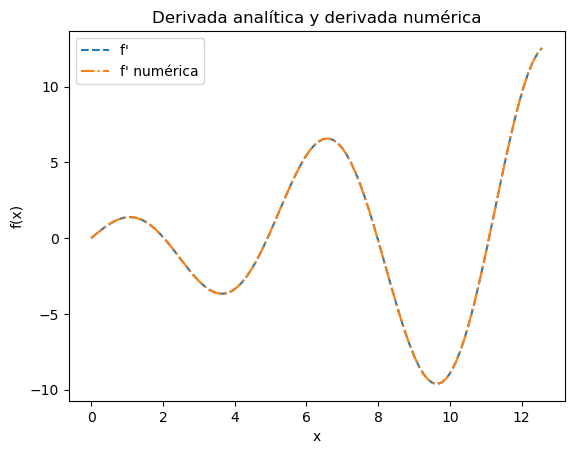

In [7]:
fig, ax = plt.subplots()
ax.set(title = 'Derivada analítica y derivada numérica')
ax.set(xlabel = 'x', ylabel = 'f(x)')
plot(x, dy, '--' , label = "f' ")
plot(x, der_h4, '-.', label = "f' numérica")
legend()
show()

### Integración numérica hasta cuarto orden

Ahora encontraremos la primitiva de una función hasta cuarto orden (inclusive) numéricamente.

In [8]:
def integra_h4(x,f): #Definición de la función. Recibe la malla equiespaciada y una malla del dominio evaluado.
    mod_f, int_f, h = len(f)%2, 0, x[1]-x[0] #Paridad de card(x), valor de la integral y paso.
    
    if mod_f == 0: #Si la malla tiene cardinalidad par
        
        int_f += (-19/720*f[4]+53/360*f[3]-11/30*f[2]+323/360*f[1]-251/720*f[0]) #Calcula el primer intervalo
        
        for i in range(2,len(f)-3,2): #Calcula los intervalos intermedios
            int_f += (-1/90*f[i+2]+17/45*f[i+1]+19/15*f[i]+17/45*f[i-1]-1/90*f[i-2])
            
        int_f += -(-19/720*f[-4]+53/360*f[-3]-11/30*f[-4]+323/360*f[-3]-251/720*f[-2]) #Penúltimo intervalo
        int_f += -(-19/720*f[-3]+53/360*f[-2]-11/30*f[-3]+323/360*f[-2]-251/720*f[-1]) #Último intervalo
        
    else: #Si no es par, es impar. Se calcula como sigue
        
        int_f += (-19/720*f[4]+53/360*f[1]-11/30*f[2]+323/360*f[1]-251/720*f[0]) #Calcula el primer intervalo igual
        
        for i in range(2,len(f)-2,2): #Calcula los intervalos intermedios dejando la última mitad libre
            int_f += (-1/90*f[i+2]+17/45*f[i+1]+19/15*f[i]+17/45*f[i-1]-1/90*f[i-2]) #El cálculo es el mismo
        
        int_f += -(-19/720*f[-3]+53/360*f[-2]-11/30*f[-3]+323/360*f[-2]-251/720*f[-1]) #Último intervalo igual
    
    return int_f * h

In [9]:
# PRUEBA CON EL CASO PAR Y EL CASO IMPAR.
"""
La diferencia entre las dos integrales me parece muy grande. ¿Ves algún error grave?
"""

x_par = linspace(0,2*pi,100)
x_impar = linspace(0,2*pi,101)

y_par = sin(x_par)**2
y_impar = sin(x_impar)**2

integral_par = integra_h4(x_par, y_par)
integral_impar = integra_h4(x_impar, y_impar)


print(integral_par, integral_impar)

3.140966421347989 3.1413509173637273


In [219]:
#Primitiva

def primitiva(x, f):
    h = x[1] - x[0]
    
    if len(f) % 2 == 0: #Si el número de puntos en el dominio es par
        carddom = int(len(x)/2 + 1) #Calcula el número de puntos efectivos a obtener
        newx, F = zeros(carddom), zeros(carddom)
        
        #Cálculo del primer intervalo no simétrico
        F[0] = (-19/720*f[4]+53/360*f[3]-11/30*f[2]+323/360*f[1]-251/720*f[0])*h #Toma los primeros 4 vals de f
        
        for i in range(1, carddom - 2): #Calcula las áreas de los puntos intermedios
            j = int(2*i) #Define un contador auxiliar para saltar en el dominio original así: OxOxO
            F[i] = F[i-1] + (17/45*f[j+1] + 19/15*f[j]+17/45*f[j-1]-1/90*f[j-2])*h #Suma el área acumulada
            newx[i] = x[j] #Toma el punto del dominio que corresponde al punto calculado con f[j]
        
        print(F[-2], F[-3] )
        F[-2] = F[-3] + (-19/720*f[-6]+53/360*f[-5]-11/30*f[-4]+323/360*f[-3]-251/720*f[-2])*(-h) #Penúltimo valor
        F[-1] = F[-2] + (-19/720*f[-5]+53/360*f[-4]-11/30*f[-3]+323/360*f[-2]-251/720*f[-1])*(-h) #Último valor
        newx[-2], newx[-1], newx[0] = x[-2], x[-1], x[0] #Valores del nuevo dominio de los puntos especiales
        print(F[-1],F[-2], F[-3])

                    
        return newx, F #Regresa el nuevo dominio y los valores de F iterados multiplicados por h.
        
        
    else: #Si el número de puntos en el dominio es impar
        carddom = int((len(x)+1)/2) #Calcula el número de puntos efectivos a obtener
        newx, F = zeros(carddom), zeros(carddom)
        
        #Cálculo del primer intervalo no simétrico
        F[0] = (-19/720*f[4]+53/360*f[1]-11/30*f[2]+323/360*f[1]-251/720*f[0])*h #Toma los primeros 4 vals de f
        
        for i in range(1, carddom-1): #Calcula las áreas de los puntos intermedios
            j = int(2*i) #Define un contador auxiliar para saltar en el dominio original así: OxOxO
            F[i] = F[i-1] + (-1/90*f[j+2] + 17/45*f[j+1] + 19/15*f[j]+17/45*f[j-1]-1/90*f[j-2])*h #Suma el área acumulada
            newx[i] = x[j] #Toma el punto del dominio que corresponde al punto calculado con f[j]
                    
        F[-1] = F[-2] + (-19/720*f[-5]+53/360*f[-4]-11/30*f[-3]+323/360*f[-2]-251/720*f[-1])*(-h) #Último valor
        newx[-1], newx[0] = x[-1], x[0] #Valores del nuevo dominio de los puntos especiales
        
        return newx, F #Regresa el nuevo dominio y los valores de F iterados multiplicados por h.

0.0 1.9398283621686971
1.9076374429145704 1.9233069089784762 1.9398283621686971


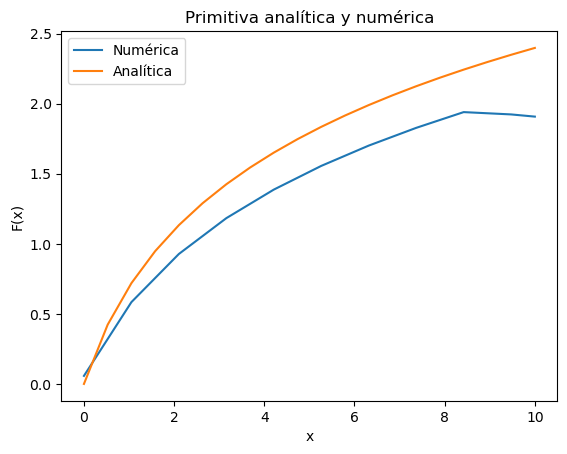

In [220]:
x = linspace(0, 10, 20) #Se da un dominio equiespaciado de 200 puntos entre 0 y 5
dom, prueba = primitiva(x,1/(x+1)) #Se calcula la primitiva con la función anterior
 

# Graficación
fig, ax = plt.subplots()
ax.set(title = 'Primitiva analítica y numérica')
ax.set(xlabel = 'x', ylabel = 'F(x)')
plot(dom, prueba, label = 'Numérica') #Se da la primitiva numérica
plot(x,log(x+1), label = 'Analítica') #Se da la primitiva analítica, que es sin(x)
legend()
show()


#Nótese que la numérica tiene puntos en la imagen mayores a 1 y eso está mal. Parece que hay cosas sumándose de más.